In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats, integrate, optimize
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
#%config InlineBackend.figure_format = 'svg'
#from matplotlib.pyplot import *
#%matplotlib inline
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

In [3]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [4]:
new = pd.read_excel("Results_Updated_2014_2015.xlsx")

In [5]:
Monthly_Positive = new.groupby(["Date"]).count().resample("M", how="sum")["Order"] - new.groupby(["Date"]).count().resample("M", how="sum")["RNONE"]
Monthly_Total = new.groupby(["Date"]).count().resample("M", how="sum")["Order"]
Monthly_Percent = Monthly_Positive / Monthly_Total
Monthly_Data = pd.concat([Monthly_Positive, Monthly_Total, Monthly_Percent], axis=1)
Monthly_Data = Monthly_Data.rename(columns={0:"Positive", "Order":"Total", 1:"Percent"})
Monthly_Data["Percent"]=Monthly_Data["Percent"]*100

In [6]:
Daily_Positive = new.groupby("Date").count()["Order"] - new.groupby("Date").count()["RNONE"]
Daily_Total = new.groupby("Date").count()["Order"]
Daily_Percent =(Daily_Positive/Daily_Total)*100
Daily_Data = pd.concat([Daily_Positive, Daily_Total, Daily_Percent], axis=1)
Daily_Data = Daily_Data.rename(columns={0:"Positive", "Order":"Total", 1:"Percent"})

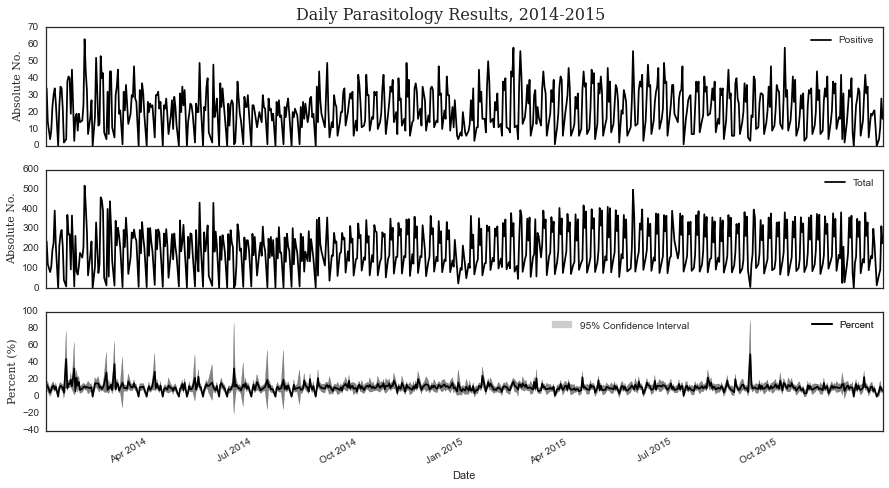

In [28]:
sns.set_style("white")
ax = Daily_Data.drop('Year', axis=1).plot(subplots=True, figsize=[15,8], color="black")
plt.suptitle("Daily Parasitology Results, 2014-2015", y=.935, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")

def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record

Data_CI = SEP(Daily_Data["Positive"].values, Daily_Data["Total"].values)

x=Daily_Data.index
ax[2].fill_between(x, Data_CI['lb']*100, Data_CI['ub']*100, color="0.2", alpha=0.6)


grey_patch = mpatches.Patch(color='0.8', label='95% Confidence Interval')
ax[2].add_artist(ax[2].legend(handles=[grey_patch], loc=(0.6,0.81)))
handles, labels = ax[2].get_legend_handles_labels()
ax[2].add_artist(ax[2].legend(handles=handles, loc=1))
plt.setp(plt.gca().get_legend().get_texts(), alpha=0.80);

In [8]:
adp = [np.random.choice(Daily_Data["Percent"].values, 617).mean() for i in range(100000)]

In [9]:
adpos = [np.random.choice(Daily_Data["Positive"].values, 617).mean() for i in range(100000)]

In [10]:
adtot = [np.random.choice(Daily_Data["Total"].values, 617).mean() for i in range(100000)]

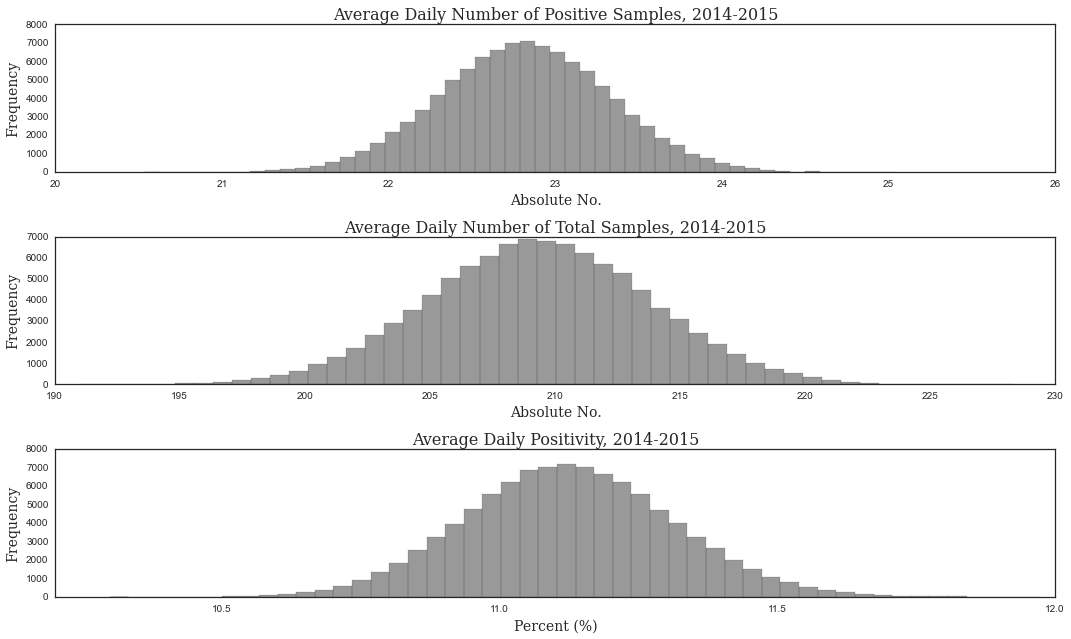

In [11]:
f, ax = plt.subplots(3, 1, figsize=[15,9])

ax[2] = sns.distplot(adp, kde=False, color="black", ax=ax[2])
ax[2].set_title("Average Daily Positivity, 2014-2015", y=1, size=16,family="serif")
ax[2].set_ylabel("Frequency", family="serif", size=14)
ax[2].set_xlabel("Percent (%)", family="serif", size=14)

ax[0] = sns.distplot(adpos, kde=False, color="black", ax=ax[0])
ax[0].set_title("Average Daily Number of Positive Samples, 2014-2015", y=1, size=16,family="serif")
ax[0].set_ylabel("Frequency", family="serif", size=14)
ax[0].set_xlabel("Absolute No.", family="serif", size=14)

ax[1] = sns.distplot(adtot, kde=False, color="black", ax=ax[1])
ax[1].set_title("Average Daily Number of Total Samples, 2014-2015", y=1, size=16,family="serif")
ax[1].set_ylabel("Frequency", family="serif", size=14)
ax[1].set_xlabel("Absolute No.", family="serif", size=14)
plt.tight_layout();

In [12]:
def sample_summary(samples):
    mean = np.array(samples).mean()
    lc = np.percentile(np.array(samples), 2.5)
    uc = np.percentile(np.array(samples), 97.5)
    return mean, lc, uc

In [13]:
sample_summary(adp)

(11.125536740723808, 10.768001928388932, 11.49899599466457)

In [14]:
sample_summary(adpos)

(22.817540972447325, 21.823338735818478, 23.815235008103727)

In [15]:
sample_summary(adtot)

(209.36349439222042, 200.65960291734197, 218.0924230145867)

In [16]:
amp = [np.random.choice(Monthly_Data["Percent"].values, 24).mean() for i in range(100000)]

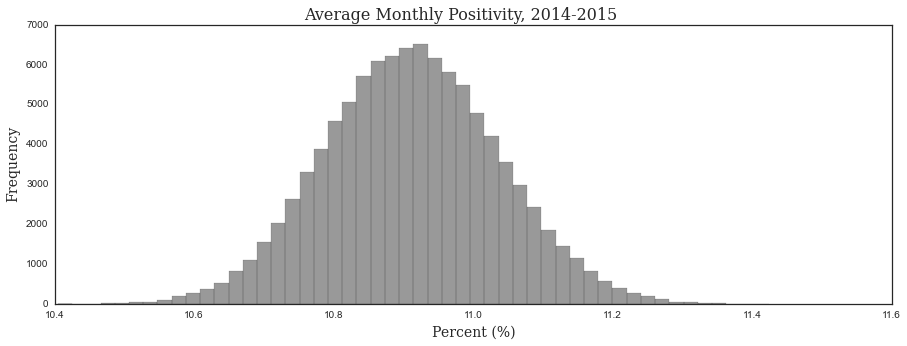

In [17]:
plt.figure(figsize=[15,5])
ax = sns.distplot(amp, kde=False, color="black")
plt.suptitle("Average Monthly Positivity, 2014-2015", y=.95, size=16,family="serif")
ax.set_ylabel("Frequency", family="serif", size=14)
ax.set_xlabel("Percent (%)", family="serif", size=14);

In [18]:
Winter = Daily_Data[(Daily_Data.index.month == 1) | (Daily_Data.index.month == 2) |(Daily_Data.index.month == 12)]
Spring = Daily_Data[(Daily_Data.index.month == 3) | (Daily_Data.index.month == 4) |(Daily_Data.index.month == 5)]
Summer = Daily_Data[(Daily_Data.index.month == 6) | (Daily_Data.index.month == 7) |(Daily_Data.index.month == 8)]
Fall = Daily_Data[(Daily_Data.index.month == 9) | (Daily_Data.index.month == 10) |(Daily_Data.index.month == 11)]

In [19]:
Win = [np.random.choice(Winter["Percent"].values, Winter.shape[0]).mean() for i in range(100000)]
Spr = [np.random.choice(Spring["Percent"].values, Spring.shape[0]).mean() for i in range(100000)]
Sum = [np.random.choice(Summer["Percent"].values, Summer.shape[0]).mean() for i in range(100000)]
Fal = [np.random.choice(Fall["Percent"].values, Fall.shape[0]).mean() for i in range(100000)]

In [20]:
Winter_Spring_Diff = [(np.random.choice(Winter["Percent"].values, Winter.shape[0]).mean()-np.random.choice(Spring["Percent"].values, Spring.shape[0]).mean()) for i in range(100000)]

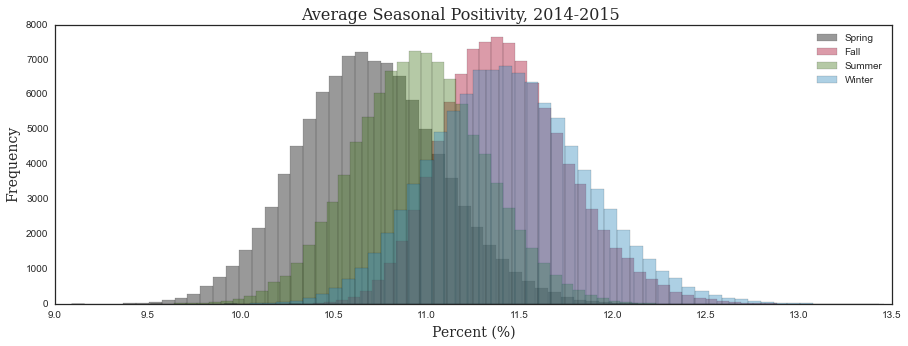

In [21]:
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]
plt.figure(figsize=[15,5])
ax = sns.distplot(Spr, kde=False, color="black", label="Spring")
ax = sns.distplot(Fal, kde=False, color=colors[1], label="Fall")
ax = sns.distplot(Sum, kde=False, color=colors[3], label="Summer")
ax = sns.distplot(Win, kde=False, color=colors[0], label="Winter")
plt.suptitle("Average Seasonal Positivity, 2014-2015", y=.95, size=16,family="serif")
ax.set_ylabel("Frequency", family="serif", size=14)
ax.set_xlabel("Percent (%)", family="serif", size=14)
plt.legend();

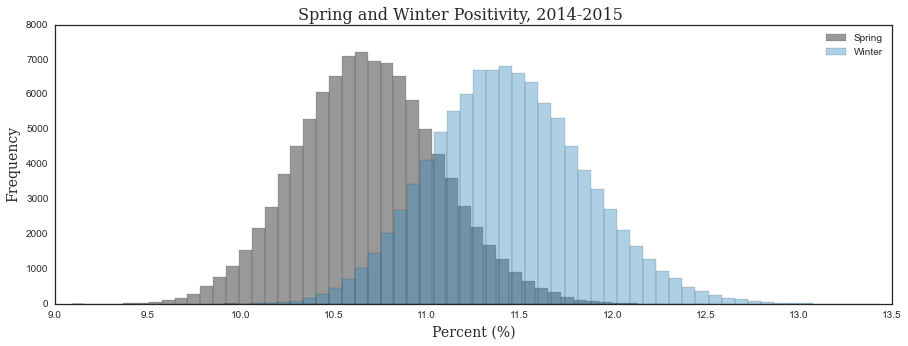

In [22]:
plt.figure(figsize=[15,5])
ax = sns.distplot(Spr, kde=False, color="black", label="Spring")
ax = sns.distplot(Win, kde=False, color=colors[0], label="Winter")
plt.suptitle("Spring and Winter Positivity, 2014-2015", y=.95, size=16,family="serif")
ax.set_ylabel("Frequency", family="serif", size=14)
ax.set_xlabel("Percent (%)", family="serif", size=14)
plt.legend();

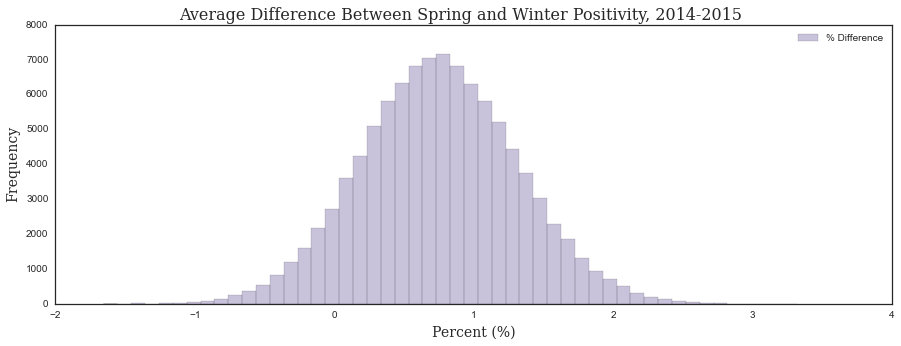

In [23]:
plt.figure(figsize=[15,5])
ax = sns.distplot(Winter_Spring_Diff, kde=False, color=colors[2], label="% Difference")
plt.suptitle("Average Difference Between Spring and Winter Positivity, 2014-2015", y=.95, size=16,family="serif")
ax.set_ylabel("Frequency", family="serif", size=14)
ax.set_xlabel("Percent (%)", family="serif", size=14)
plt.legend();

In [24]:
sample_summary(Winter_Spring_Diff)

(0.75216038018727749, -0.34017390161872407, 1.8764425280701493)

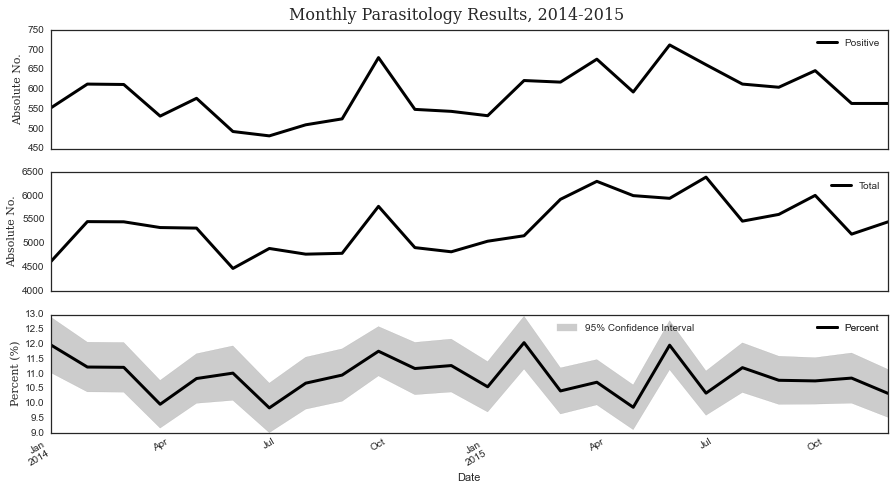

In [29]:
sns.set_style("white")
ax = Monthly_Data.drop("Year", axis=1).plot(subplots=True, lw=3, figsize=[15,8], color="black")
plt.suptitle("Monthly Parasitology Results, 2014-2015", y=.94, size=16,family="serif")
ax[0].set_ylabel("Absolute No.", family="serif")
ax[1].set_ylabel("Absolute No.", family="serif")
ax[2].set_ylabel("Percent (%)", family="serif")

def SEP(positive, total):
    record = pd.DataFrame()
    record["Positive"] = positive
    record["Total"] = total
    record["Percent"] = record["Positive"]/record["Total"]
    record['se'] = np.sqrt((record["Percent"]*(1-record["Percent"]))/record["Total"])
    record['ci'] = 1.96*record['se']
    record['lb'] = record["Percent"] - record['ci']
    record['ub'] = record["Percent"] + record['ci']
    return record

Data_CI = SEP(Monthly_Data["Positive"].values, Monthly_Data["Total"].values)

x=Monthly_Data.index
ax[2].fill_between(x, Data_CI['lb']*100, Data_CI['ub']*100, color="0.5", alpha=0.4)
ax[2].plot(x, Monthly_Data["Percent"])

grey_patch = mpatches.Patch(color='0.8', label='95% Confidence Interval')
ax[2].add_artist(ax[2].legend(handles=[grey_patch], loc=(0.6,0.81)))
handles, labels = ax[2].get_legend_handles_labels()
ax[2].add_artist(ax[2].legend(handles=handles, loc=1))
plt.setp(plt.gca().get_legend().get_texts(), alpha=0.80);

In [26]:
stats.f_oneway(Monthly_Data["Percent"][:12].values,Monthly_Data["Percent"][12:].values)

F_onewayResult(statistic=0.45146516980138096, pvalue=0.50863525221414396)

In [37]:
Monthly_Data["Month"] = np.nan
Monthly_Data.loc[Monthly_Data.index.month == 1, "Month"] = "JAN"
Monthly_Data.loc[Monthly_Data.index.month == 2, "Month"] = "FEB"
Monthly_Data.loc[Monthly_Data.index.month == 3, "Month"] = "MAR"
Monthly_Data.loc[Monthly_Data.index.month == 4, "Month"] = "APR"
Monthly_Data.loc[Monthly_Data.index.month == 5, "Month"] = "MAY"
Monthly_Data.loc[Monthly_Data.index.month == 6, "Month"] = "JUNE"
Monthly_Data.loc[Monthly_Data.index.month == 7, "Month"] = "JULY"
Monthly_Data.loc[Monthly_Data.index.month == 8, "Month"] = "AUG"
Monthly_Data.loc[Monthly_Data.index.month == 9, "Month"] = "SEPT"
Monthly_Data.loc[Monthly_Data.index.month == 10, "Month"] = "OCT"
Monthly_Data.loc[Monthly_Data.index.month == 11, "Month"] = "NOV"
Monthly_Data.loc[Monthly_Data.index.month == 12, "Month"] = "DEC"
Monthly_Data["Year"]=np.nan
Monthly_Data.loc[Monthly_Data.index.year == 2014, "Year"] = 2014
Monthly_Data.loc[Monthly_Data.index.year == 2015, "Year"] = 2015

Daily_Data["Day"] = np.nan
Daily_Data["Month"] = np.nan
Daily_Data["Year"] = np.nan
Daily_Data.loc[Daily_Data.index.weekday==0, "Day"] = "Monday"
Daily_Data.loc[Daily_Data.index.weekday==1, "Day"] = "Tuesday"
Daily_Data.loc[Daily_Data.index.weekday==2, "Day"] = "Wednesday"
Daily_Data.loc[Daily_Data.index.weekday==3, "Day"] = "Thursday"
Daily_Data.loc[Daily_Data.index.weekday==4, "Day"] = "Friday"
Daily_Data.loc[Daily_Data.index.weekday==5, "Day"] = "Saturday"
Daily_Data.loc[Daily_Data.index.weekday==6, "Day"] = "Sunday"
Daily_Data.loc[Daily_Data.index.month == 1, "Month"] = "JAN"
Daily_Data.loc[Daily_Data.index.month == 2, "Month"] = "FEB"
Daily_Data.loc[Daily_Data.index.month == 3, "Month"] = "MAR"
Daily_Data.loc[Daily_Data.index.month == 4, "Month"] = "APR"
Daily_Data.loc[Daily_Data.index.month == 5, "Month"] = "MAY"
Daily_Data.loc[Daily_Data.index.month == 6, "Month"] = "JUNE"
Daily_Data.loc[Daily_Data.index.month == 7, "Month"] = "JULY"
Daily_Data.loc[Daily_Data.index.month == 8, "Month"] = "AUG"
Daily_Data.loc[Daily_Data.index.month == 9, "Month"] = "SEPT"
Daily_Data.loc[Daily_Data.index.month == 10, "Month"] = "OCT"
Daily_Data.loc[Daily_Data.index.month == 11, "Month"] = "NOV"
Daily_Data.loc[Daily_Data.index.month == 12, "Month"] = "DEC"
Daily_Data.loc[Daily_Data.index.year == 2014, "Year"] = 2014
Daily_Data.loc[Daily_Data.index.year == 2015, "Year"] = 2015

In [35]:
Daily_Data.head()

,Positive,Total,Percent,Day,Year,Month
Date,,,,,,
2014-01-02,10,81,12.345679,Thursday,2014,JAN
2014-01-03,34,237,14.345992,Friday,2014,JAN
2014-01-04,14,121,11.570248,Saturday,2014,JAN
2014-01-06,4,82,4.878049,Monday,2014,JAN
2014-01-07,9,109,8.256881,Tuesday,2014,JAN


In [36]:
Monthly_Data.head()

,Positive,Total,Percent,Month,Year
Date,,,,,
2014-01-31,553,4619,11.972288,JAN,2014
2014-02-28,613,5459,11.229163,FEB,2014
2014-03-31,612,5455,11.219065,MAR,2014
2014-04-30,532,5334,9.973753,APR,2014
2014-05-31,577,5322,10.841789,MAY,2014


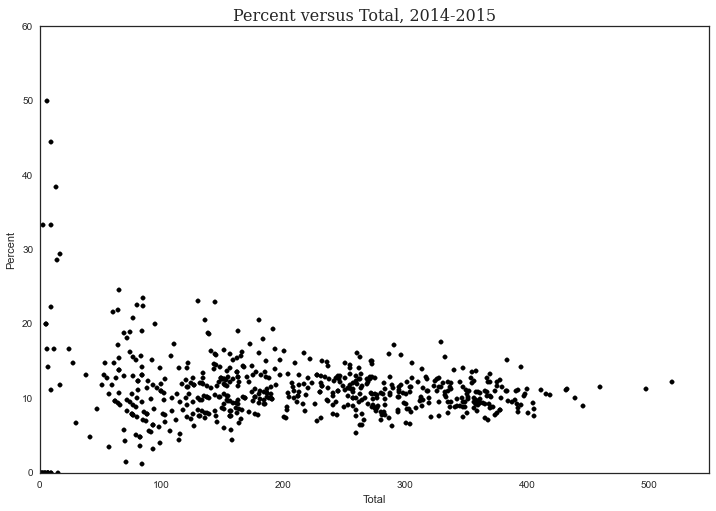

In [38]:
sns.set_style("white")
#plt.scatter(Daily_Data.Total, Daily_Data.Percent, color="black")
Daily_Data.plot(kind="scatter", x="Total", y="Percent", color="black", figsize=[12,8])
plt.ylim([0,60])
plt.xlim([0,550])
plt.suptitle("Percent versus Total, 2014-2015", y=.935, size=16,family="serif");

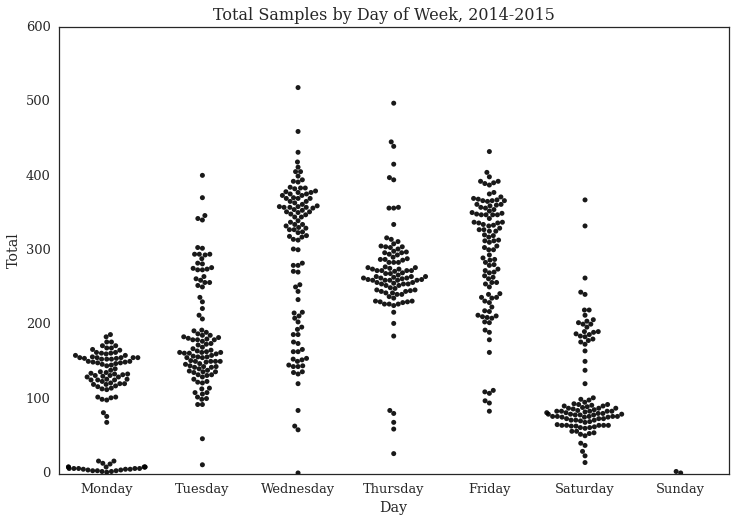

In [39]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
plt.figure(figsize=[12,8])
ax = sns.swarmplot(x="Day", y="Total", data=Daily_Data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color='black', alpha=0.9)
plt.ylim([0,600])
plt.suptitle("Total Samples by Day of Week, 2014-2015", y=.935, size=16,family="serif");

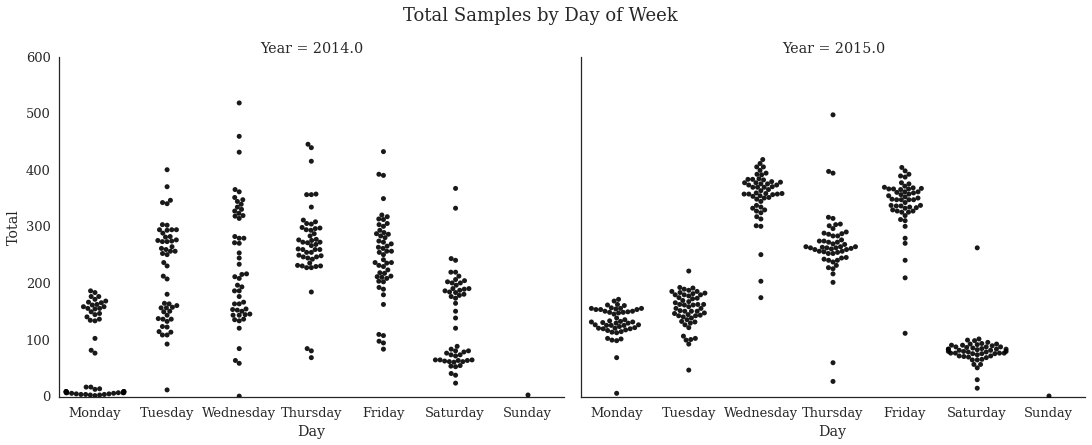

In [40]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
ax = sns.factorplot(x="Day", y="Total", data=Daily_Data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color='black', alpha=0.9, col="Year", kind="swarm", size=6, aspect=1.3)
plt.ylim([0,600])
plt.suptitle("Total Samples by Day of Week", y=1.04, size=18,family="serif");

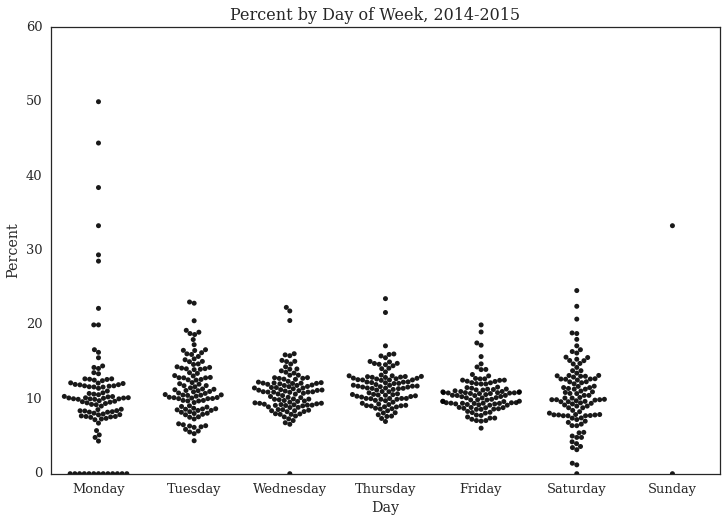

In [41]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
plt.figure(figsize=[12,8])
ax = sns.swarmplot(x="Day", y="Percent", data=Daily_Data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color='black', alpha=0.9)
plt.ylim([0,60])
plt.suptitle("Percent by Day of Week, 2014-2015", y=.935, size=16,family="serif");

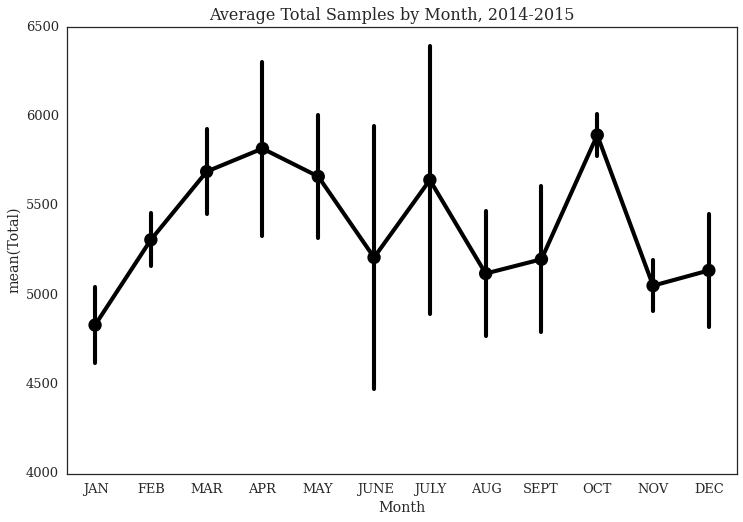

In [42]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
plt.figure(figsize=[12,8])
ax = sns.pointplot(x="Month", y="Total", data=Monthly_Data,order=["JAN", "FEB", "MAR", "APR", "MAY", "JUNE", "JULY", "AUG", "SEPT", "OCT", "NOV", "DEC"], color="black", alpha=0.9, ci=95)
#plt.ylim([0,600])
plt.suptitle("Average Total Samples by Month, 2014-2015", y=.935, size=16,family="serif");

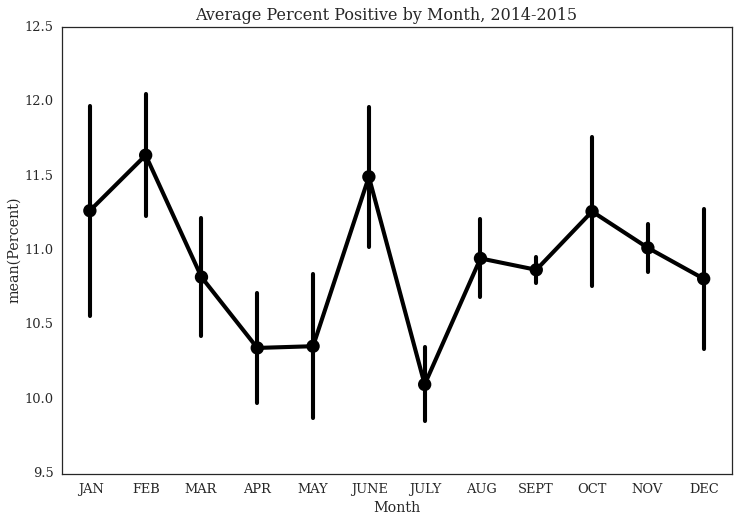

In [43]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
plt.figure(figsize=[12,8])
ax = sns.pointplot(x="Month", y="Percent", data=Monthly_Data,order=["JAN", "FEB", "MAR", "APR", "MAY", "JUNE", "JULY", "AUG", "SEPT", "OCT", "NOV", "DEC"], color="black", alpha=0.9, ci=95)
#plt.ylim([0,600])
plt.suptitle("Average Percent Positive by Month, 2014-2015", y=.935, size=16,family="serif");

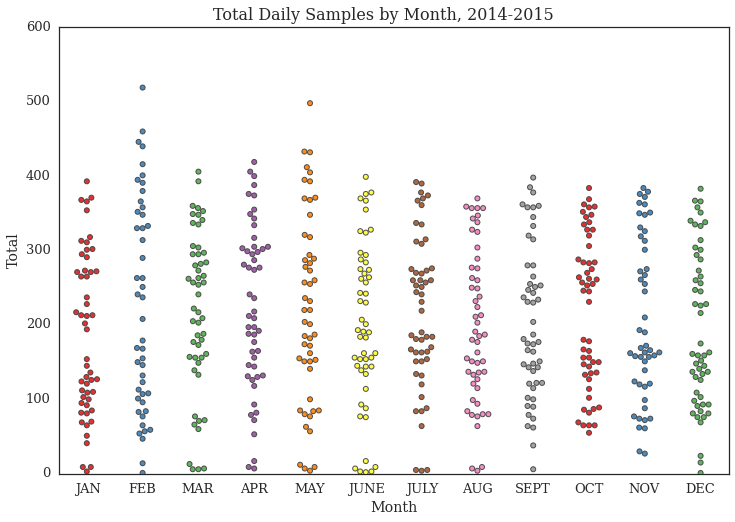

In [44]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style({'font.family':'serif'})
plt.figure(figsize=[12,8])
ax = sns.swarmplot(x="Month", y="Total", data=Daily_Data, alpha=0.9, linewidth=1, palette="Set1")
plt.ylim([0,600])
plt.suptitle("Total Daily Samples by Month, 2014-2015", y=.935, size=16,family="serif");

In [45]:
#import IPython.core.display as di
#di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)